# **Dataset Generation:**

*Generate a synthetic dataset containing input features and corresponding class labels.*

*Ensure that the dataset has five distinct classes.*

*The input features are also suitable for training a neural network.*


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder



np.random.seed(42)


n_samples = 1000
n_features = 2
n_classes = 5


X, y = make_blobs(n_samples=n_samples,
                  centers=n_classes,
                  n_features=n_features,
                  random_state=42,
                  cluster_std=1.5)


ohe = OneHotEncoder(sparse_output=False)
Y = ohe.fit_transform(y.reshape(-1, 1))


print(f"Output labels (Y) shape: {Y.shape}")
print(f"Number of classes: {n_classes}")



Input features (X) shape: (1000, 2)
Output labels (Y) shape: (1000, 5)
Number of classes: 5


# **Code Modification**

In [ ]:
import matplotlib.pyplot as plt


class NeuralNetwork(object):
    def __init__(self, n_features, n_classes):
        inputLayerNeurons = n_features
        hiddenLayerNeurons = 10
        outLayerNeurons = n_classes

        self.learning_rate = 0.2


        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_H2H1 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_H3H2 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)
        self.W_OH3 = np.random.randn(hiddenLayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:

            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def softmax(self, x):

        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):

        H1_input = np.dot(X, self.W_H1I)
        self.H1_out = self.sigmoid(H1_input)


        H2_input = np.dot(self.H1_out, self.W_H2H1)
        self.H2_out = self.sigmoid(H2_input)


        H3_input = np.dot(self.H2_out, self.W_H3H2)
        self.H3_out = self.sigmoid(H3_input)


        output_input = np.dot(self.H3_out, self.W_OH3)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_delta = (pred - Y) / X.shape[0]


        self.W_OH3 -= self.learning_rate * self.H3_out.T.dot(output_delta)


        H3_error = output_delta.dot(self.W_OH3.T)
        H3_delta = H3_error * self.sigmoid(self.H3_out, der=True)


        self.W_H3H2 -= self.learning_rate * self.H2_out.T.dot(H3_delta)


        H2_error = H3_delta.dot(self.W_H3H2.T)
        H2_delta = H2_error * self.sigmoid(self.H2_out, der=True)


        self.W_H2H1 -= self.learning_rate * self.H1_out.T.dot(H2_delta)


        H1_error = H2_delta.dot(self.W_H2H1.T)
        H1_delta = H1_error * self.sigmoid(self.H1_out, der=True)


        self.W_H1I -= self.learning_rate * X.T.dot(H1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def predict(self, X):
        return np.argmax(self.feedForward(X), axis=1)

# **Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)


NN = NeuralNetwork(n_features=n_features, n_classes=n_classes)
epochs = 10000

for i in range(epochs):
    NN.train(X_train, Y_train)




Y_pred_labels = NN.predict(X_test)
Y_test_labels = np.argmax(Y_test, axis=1)


accuracy = accuracy_score(Y_test_labels, Y_pred_labels)


report = classification_report(Y_test_labels, Y_pred_labels, digits=4)

print("--- Model Evaluation on Testing Data ---")
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClassification Report (Precision, Recall, F1-Score):")
print(report)

--- Model Evaluation on Testing Data ---
Overall Accuracy: 0.9450

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0     1.0000    0.9500    0.9744        40
           1     0.9189    0.8500    0.8831        40
           2     1.0000    1.0000    1.0000        40
           3     0.9756    1.0000    0.9877        40
           4     0.8409    0.9250    0.8810        40

    accuracy                         0.9450       200
   macro avg     0.9471    0.9450    0.9452       200
weighted avg     0.9471    0.9450    0.9452       200



# **Result and Analysis**

<Figure size 800x800 with 0 Axes>

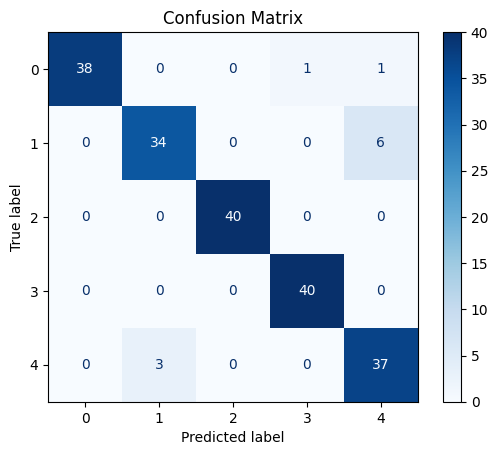

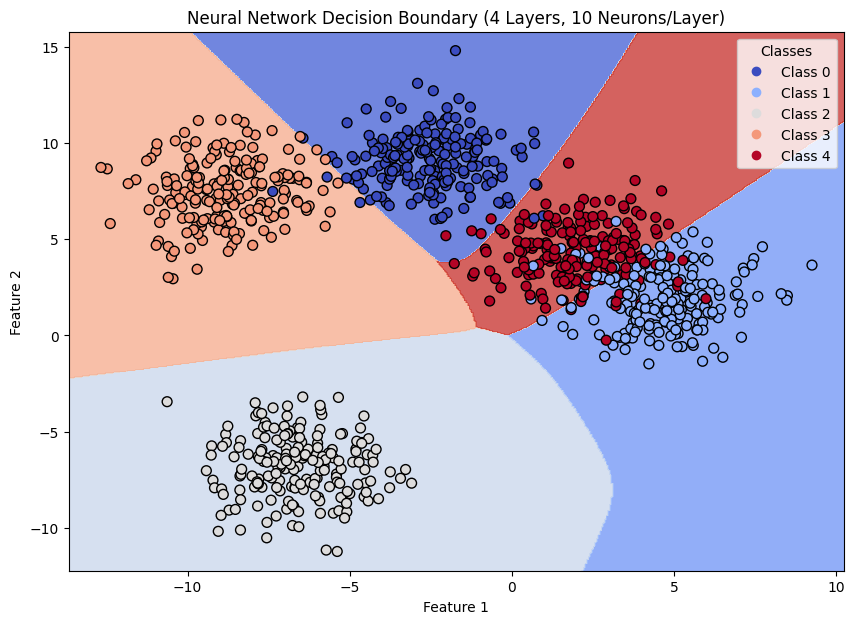

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(Y_test_labels, Y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ohe.categories_[0])
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)


scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title("Neural Network Decision Boundary (4 Layers, 10 Neurons/Layer)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Class {i}' for i in range(n_classes)], title="Classes")
plt.show()

The assignment is to implement and evaluate a three-hidden-layer Neural Network for a multi-class classification problem with five distinct classes.

The main tasks include:

1.Generating a synthetic dataset with five classes.

2.Modifying existing code to correctly implement the Softmax output layer and adapt the backpropagation algorithm for five classes.

3.Training the model on the dataset.

4.Evaluating performance using metrics like accuracy, precision, recall, and F1-score for all five classes.

5.Documenting all code modifications, results, and analysis of the model's performance.


